<a href="https://colab.research.google.com/github/kimchangwoo1011/2020-C-code/blob/master/33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                  # 사용할 라이브러리 불러오기


from keras.utils import np_utils    # 숫자 -> One-hot Vector 를 위한 라이브러리

from keras.datasets import cifar10  # CIFAR-10 Dataset을 가져오기 위한 라이브러리

from keras.models import Sequential # 순차적인 모델을 만들기 위한 Sequential 함수

from keras.layers import Dense, Activation   # 필요한 층들을 가지고 있는 layers 라이브러리
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

# Google Colab에서 이미지를 보기 위한 cv2_imshow 함수
from google.colab.patches import cv2_imshow

170500096/170498071 [==============================] - 4s 0us/step
x_train : (50000, 32, 32, 3)
y_train : (50000, 1)
x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


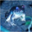

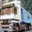

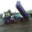

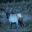

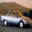

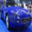

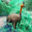

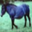

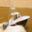

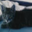

In [ ]:
# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))
print('x_test :', np.shape(x_test))
print('y_test :', np.shape(y_test))

for i in range(10):     # Training Dataset의 이미지 10개
  cv2_imshow(x_train[i])

In [ ]:
x_train = x_train.astype('float32') / 255.0  # Loss의 스케일 조정을 위해 0 ~ 255 -> 0 ~ 1 범위로 
x_test = x_test.astype('float32') / 255.0
                                               # Test Dataset을 Validation Set으로 써봅니다
                                            # One-Hot Encoding (숫자 -> One-Hot Vector) 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('y_train :', np.shape(y_train))

y_train : (50000, 10)


In [ ]:
# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='CIFAR10_CNN')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', 
                 input_shape=(width, height, channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         

In [ ]:
# 모델 학습과정 설정하기
# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, SGD를 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=30,
                 batch_size=32,
                 validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0605 - accuracy: 0.2453 - val_loss: 1.8024 - val_accuracy: 0.3505
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5601 - accuracy: 0.4452 - val_loss: 1.4231 - val_accuracy: 0.4975
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3738 - accuracy: 0.5125 - val_loss: 1.3627 - val_accuracy: 0.5184
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2429 - accuracy: 0.5594 - val_loss: 1.2587 - val_accuracy: 0.5594
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1328 - accuracy: 0.6018 - val_loss: 1.1524 - val_accuracy: 0.5944
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0400 - accuracy: 0.6354 - val_loss: 1.1463 - val_accuracy: 0.5981
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9522 - accuracy: 0.6675 - val_loss: 1.1003 - val_accuracy:

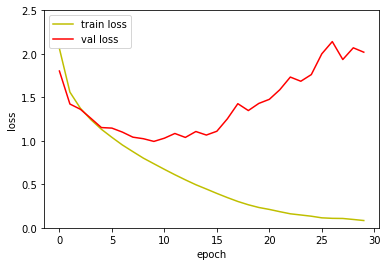

In [ ]:
# 그래프를 그리기 위한 matplotlib 라이브러리
import matplotlib.pyplot as plt
# Training Loss VS Validation Loss 비교를 위한 그래프 그리기 
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')
# y축 범위 설정
plt.ylim([0.0, 2.5])
# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')
# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')
plt.show()

In [ ]:
#모델 평가
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test set Loss and Accuracy')
print(loss_and_acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.0190 - accuracy: 0.6779
Test set Loss and Accuracy
[2.019035577774048, 0.6779000163078308]


예측: 고양이 / 정답: 고양이


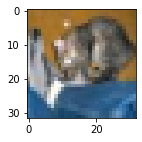

예측: 배 / 정답: 배


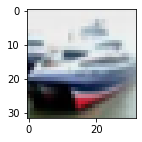

예측: 비행기 / 정답: 배


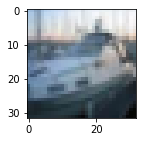

예측: 배 / 정답: 비행기


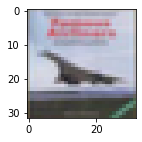

예측: 사슴 / 정답: 개구리


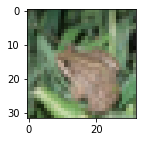

예측: 개구리 / 정답: 개구리


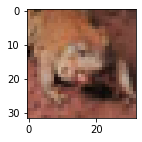

예측: 자동차 / 정답: 자동차


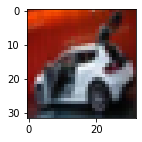

예측: 개구리 / 정답: 개구리


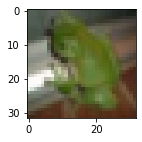

예측: 고양이 / 정답: 고양이


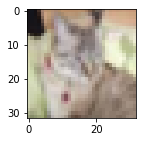

예측: 자동차 / 정답: 자동차


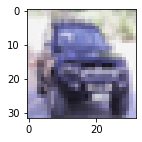

In [ ]:
#모델 사용하기
# 이미지의 종류가 무엇인지에 대한 리스트
labels = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
# 출력 그림의 크기를 결정합니다.
plt.rcParams["figure.figsize"] = (2,2)
# Test Set의 10개를 맞추어 봅시다.
for i in range(10):
  # 모델 사용 
  output = model.predict(x_test[i].reshape(1,width, height, channel))
  
  # 이미지 출력 
  plt.imshow(x_test[i].reshape(width, height, channel))
  # np.argmax()가 labels의 인덱스가 되어 labels 배열에 있는 문자열을 출력합니다.
  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(y_test[i])])
  plt.show()